In [8]:
import os
import cv2
import matplotlib.pyplot as plt
from IPython.display import Image
from ultralytics import YOLO
import random

## テストデータの推論

In [2]:
# テストデータへのpathのリストを取得
data_dir = "C:/Users/yuuki/Kaggle/object_detection_try/shellfish/after_data/test"
image_paths = [os.path.join(data_dir, 'images', filename) for filename in os.listdir(os.path.join(data_dir, 'images')) if filename.endswith(".jpg")]

In [3]:
# bestなモデルの読み込み
best_model = YOLO("runs/detect/train2/weights/best.pt")

In [4]:
# 推論
results = best_model(image_paths)


0: 416x416 (no detections), 15.8ms
1: 416x416 2 Crabs, 15.8ms
2: 416x416 6 Shrimps, 15.8ms
3: 416x416 2 Crabs, 15.8ms
4: 416x416 1 Lobster, 15.8ms
5: 416x416 10 Shrimps, 15.8ms
6: 416x416 1 Lobster, 15.8ms
7: 416x416 2 Crabs, 15.8ms
8: 416x416 (no detections), 15.8ms
9: 416x416 1 Crab, 15.8ms
10: 416x416 1 Crab, 15.8ms
11: 416x416 2 Lobsters, 15.8ms
12: 416x416 3 Shrimps, 15.8ms
13: 416x416 (no detections), 15.8ms
14: 416x416 5 Shrimps, 15.8ms
15: 416x416 1 Shrimp, 15.8ms
16: 416x416 (no detections), 15.8ms
17: 416x416 1 Lobster, 15.8ms
18: 416x416 1 Lobster, 1 Shrimp, 15.8ms
19: 416x416 1 Lobster, 15.8ms
20: 416x416 1 Crab, 3 Lobsters, 15.8ms
21: 416x416 1 Lobster, 15.8ms
22: 416x416 1 Crab, 15.8ms
23: 416x416 2 Crabs, 15.8ms
24: 416x416 1 Crab, 15.8ms
25: 416x416 1 Lobster, 15.8ms
26: 416x416 2 Shrimps, 15.8ms
27: 416x416 (no detections), 15.8ms
28: 416x416 (no detections), 15.8ms
29: 416x416 1 Shrimp, 15.8ms
30: 416x416 1 Crab, 1 Lobster, 15.8ms
31: 416x416 2 Shrimps, 15.8ms
32: 41

In [5]:
# Visualize the results
for i, r in enumerate(results[:5]):
    # Plot results image (assuming plot() returns BGR-order NumPy array)
    im_bgr = r.plot()

    # Convert to RGB for display (if necessary)
    # im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)

    # Show results (consider environment and preference)
    cv2.imshow(f"Detection {i}", im_bgr)  # Using OpenCV for consistent display
    cv2.waitKey(0)  # Wait for key press to close window
    cv2.destroyAllWindows()

    # Optionally, save the image (uncomment if desired)
    # cv2.imwrite(f"detection_{i}.jpg", im_rgb)

In [6]:
# テストデータの保存先
os.makedirs("./inference_test_rev1", exist_ok=True)

In [7]:
# 保存
for i, r in enumerate(results):
    img = r.plot()
    cv2.imwrite(f"./inference_test_rev1/detection_{i}.jpg", img)

## テストデータ推論結果の描画

In [16]:
# 再度同じシード値で乱数を生成
random.seed(123)
# bboxを描画した画像が保存されたdirへのpath
path = "inference_test_rev1"

# ランダムな9枚のbboxを描画した画像の相対pathのリスト
image_list = []

# フォルダ内のすべてのファイル名を取得
filenames = os.listdir(path)

# ランダムに 9 枚の画像を選択
for _ in range(9):
    random_filename = random.choice(filenames)
    image_list.append(os.path.join(path, random_filename))

print(image_list)

['inference_test_rev1\\detection_11.jpg', 'inference_test_rev1\\detection_24.jpg', 'inference_test_rev1\\detection_13.jpg', 'inference_test_rev1\\detection_53.jpg', 'inference_test_rev1\\detection_32.jpg', 'inference_test_rev1\\detection_24.jpg', 'inference_test_rev1\\detection_14.jpg', 'inference_test_rev1\\detection_57.jpg', 'inference_test_rev1\\detection_9.jpg']


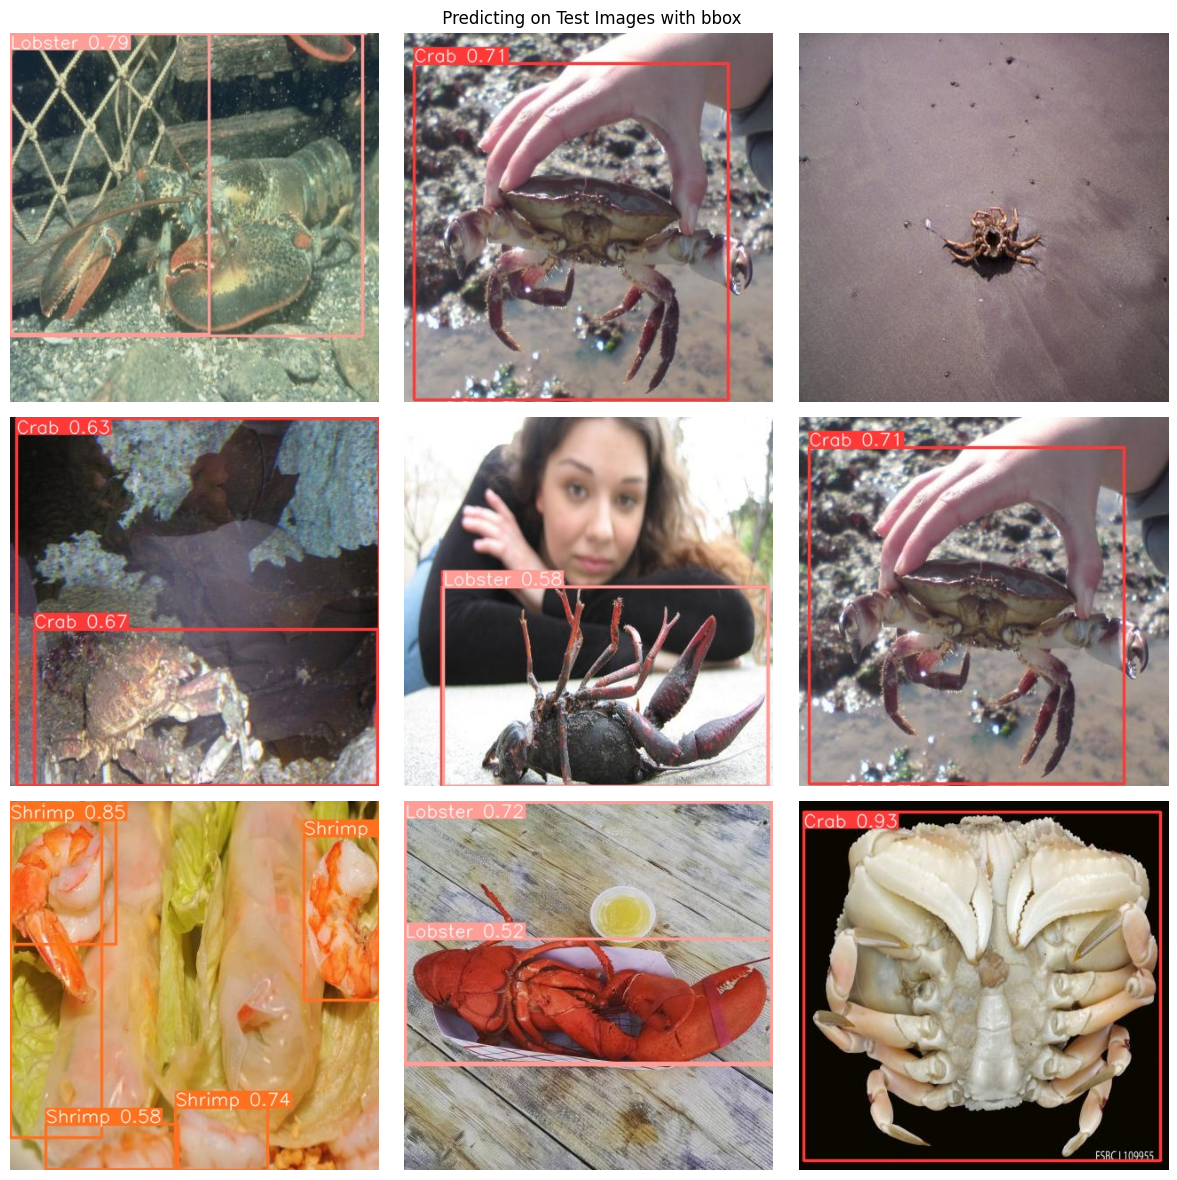

In [17]:
# 3x3のサブプロットを作成
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# 各画像を読み込んで描画
for i, image_path in enumerate(image_list):
    row = i // 3  # 行番号を取得
    col = i % 3  # 列番号を取得
    image = plt.imread(image_path)
    axes[row, col].imshow(image)

# タイトルと軸ラベルを設定
fig.suptitle(" Predicting on Test Images with bbox")
for ax in axes.flat:
    ax.axis('off')  # 軸ラベルと目盛線を非表示

# グラフを表示
plt.tight_layout()  # サブプロット間の余白を調整
plt.show()